In [1]:
import os

In [2]:
os.chdir('../run/')

In [3]:
import amc_parser

parsing ../data/02/02.asf
parsing ../data/02/02_01.amc


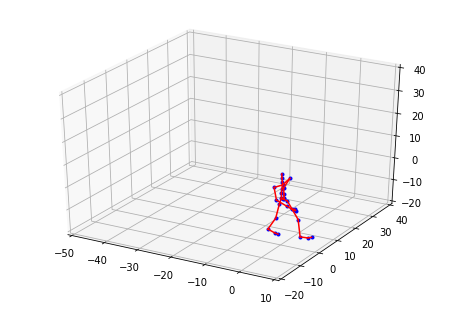

In [4]:
amc_parser.test_all()

In [5]:
th = joints['thorax']

In [6]:
joints

{'root': <amc_parser.Joint at 0x28a10afca58>,
 'lhipjoint': <amc_parser.Joint at 0x28a10b20898>,
 'lfemur': <amc_parser.Joint at 0x28a10b20978>,
 'ltibia': <amc_parser.Joint at 0x28a10b208d0>,
 'lfoot': <amc_parser.Joint at 0x28a10afca90>,
 'ltoes': <amc_parser.Joint at 0x28a10b20b38>,
 'rhipjoint': <amc_parser.Joint at 0x28a10b20b00>,
 'rfemur': <amc_parser.Joint at 0x28a10b209e8>,
 'rtibia': <amc_parser.Joint at 0x28a10b20c88>,
 'rfoot': <amc_parser.Joint at 0x28a10b20b70>,
 'rtoes': <amc_parser.Joint at 0x28a10b20d30>,
 'lowerback': <amc_parser.Joint at 0x28a10b20cf8>,
 'upperback': <amc_parser.Joint at 0x28a10b20da0>,
 'thorax': <amc_parser.Joint at 0x28a10b20e48>,
 'lowerneck': <amc_parser.Joint at 0x28a10b20e10>,
 'upperneck': <amc_parser.Joint at 0x28a10b20e80>,
 'head': <amc_parser.Joint at 0x28a10b20f28>,
 'lclavicle': <amc_parser.Joint at 0x28a10b20f60>,
 'lhumerus': <amc_parser.Joint at 0x28a10b20ef0>,
 'lradius': <amc_parser.Joint at 0x28a10b20cc0>,
 'lwrist': <amc_parser.J

In [7]:
th.coordinate

array([[  9.98658731],
       [ 22.85342303],
       [-29.60891319]])

In [8]:
th.matrix

array([[ 0.99600293, -0.06578703, -0.06041716],
       [ 0.05767229,  0.99017021, -0.12742398],
       [ 0.06820612,  0.12343026,  0.99000651]])

In [14]:
def normalize(joints):

    root_coor = joints['root'].coordinate
    root_orient = joints['root'].matrix
    root_orient_inv = np.linalg.inv(root_orient)
    
    all_bones = list(joints.keys())
    
    joints_new = copy.deepcopy(joints)
    
    for bone in all_bones:
        ex = joints_new[bone]
        ex_coordinate = ex.coordinate
        ex_matrix = ex.matrix
        
        ex_coordinate = ex_coordinate - root_coor
        ex_matrix = np.dot(ex_matrix, root_orient_inv)
        
        ex.norm_coordinate = ex_coordinate
        ex.norm_matrix = ex_matrix
    
    return joints_new

In [15]:
import numpy as np
import copy

In [16]:
j = normalize(joints)

In [20]:
j['root'].norm_matrix

array([[ 1.00000000e+00, -3.46944695e-18,  0.00000000e+00],
       [ 3.46944695e-18,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

True